In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
11,2785,4,140.0
12,1000,2,38.0
5,1170,2,38.0
14,2250,3,101.0
13,1100,2,40.0


In [ ]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

print("scaled_X: ", scaled_X, scaled_X.shape)
print("scaled_y: ", scaled_y.shape)

scaled_X:  [[0.08827586 0.25      ]
 [0.62068966 0.75      ]
 [0.22068966 0.5       ]
 [0.24862069 0.5       ]
 [0.13793103 0.25      ]
 [0.12758621 0.25      ]
 [0.6662069  0.75      ]
 [0.86206897 0.75      ]
 [0.17586207 0.5       ]
 [1.         1.        ]
 [0.34482759 0.5       ]
 [0.68448276 0.75      ]
 [0.06896552 0.25      ]
 [0.10344828 0.25      ]
 [0.5        0.5       ]
 [0.12931034 0.25      ]
 [0.13103448 0.5       ]
 [0.25517241 0.5       ]
 [0.67931034 0.5       ]
 [0.         0.        ]] (20, 2)
scaled_y:  (20, 1)


We should convert target column (i.e. price) into one dimensional array. It has become 2D due to scaling that we did above but now we should change to 1D

In [ ]:
scaled_y.reshape(scaled_y.shape[0],)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

**(1) Batch Gradient Descent (BGD):**
- Mỗi step dùng TOÀN BỘ dataset.
- Gradient chính xác.
- Loss giảm mượt.
- Ổn định, dễ debug, phù hợp với dataset nhỏ.

In [ ]:
def batch_gradient_descent(X, y_true, epochs, learning_rate=0.01):
  number_of_features = X.shape[1]
  # numpy array with 1 row and columns equal to number of features. In
  # our case number_of_features = 2 (area, bedroom)
  w = np.ones(shape=number_of_features) # [1,1]
  b = 0
  total_samples = X.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epochs):
    y_predicted = np.dot(w, X.T) + b

    w_grad = - (2/total_samples) * (X.T.dot(y_true - y_predicted))
    b_grad = - (2/total_samples) * np.sum(y_true - y_predicted)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.sum((y_true - y_predicted) ** 2) / total_samples # MSE (Mean Squared Error)
    if i%10==0:
      cost_list.append(cost)
      epoch_list.append(i)

  return w, b, cost, cost_list, epoch_list


w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]),
 np.float64(-0.23034857438407427),
 np.float64(0.0068641890429808105))

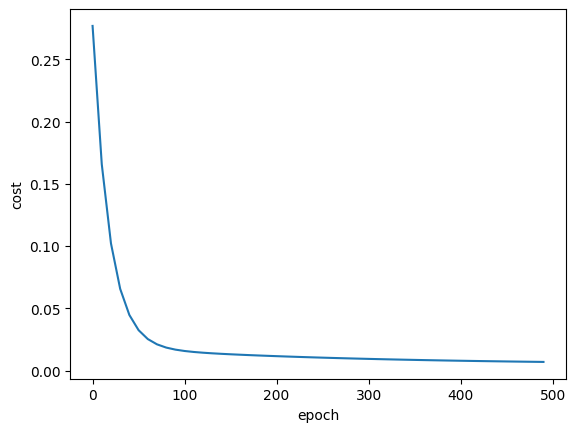

In [ ]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [ ]:
def predict(area, bedrooms, w, b):
  scaled_X = sx.transform([[area, bedrooms]])[0]
  print("scaled_X: ", scaled_X)

  scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
  print("scaled_price: ", scaled_price)

  price = sy.inverse_transform([[scaled_price]])
  print("price: ", price)

  return price[0][0]
predict(2600,4,w,b)

scaled_X:  [0.62068966 0.75      ]
scaled_price:  0.7144803261679701
price:  [[128.45484403]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(128.45484403267596)

**(2) Stochastic Gradient Descent Implementation:**
- Mỗi step dùng 1 sample.
- Gradient rất nhiễu.
- Loss dao động mạnh.
- Ưu điểm: rất nhanh mỗi step.

In [ ]:
# we will use random libary to pick random training sample.
import random
random.randint(0,6) # randit gives random number between two numbers specified in the argument

def stochastic_gradient_descent(X, y_true, epochs, learning_rate=0.01):
  number_of_features = X.shape[1]
  # numpy array with 1 row and columns equal to number of features. In
  # our case number_of_features = 2 (area, bedroom)
  w = np.ones(shape=number_of_features) # [1,1]
  b = 0
  total_samples = X.shape[0]

  cost_list = []
  epoch_list = []
  for i in range(epochs):
    random_index = random.randint(0, total_samples-1)
    sample_x = X[random_index]
    sample_y = y_true[random_index]

    y_predicted = np.dot(w, sample_x.T) + b

    w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
    b_grad = -(2/total_samples)*(sample_y-y_predicted)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.square(sample_y-y_predicted)

    if i%100==0: # at every 100th iteration record the cost and epoch value
      cost_list.append(cost)
      epoch_list.append(i)

  return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70595586, 0.67374952]),
 np.float64(-0.22960402232582844),
 np.float64(0.00661942998020891))

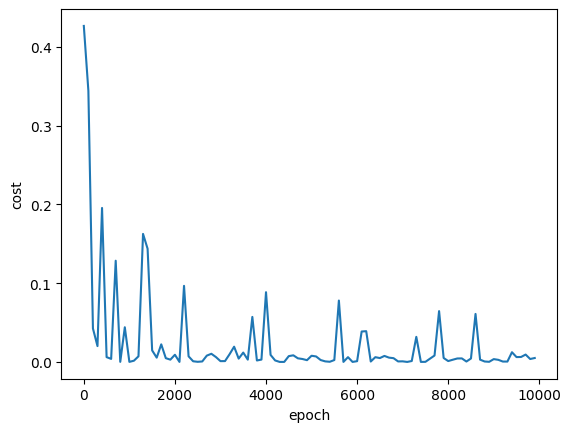

In [ ]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [ ]:
predict(2600,4,w_sgd, b_sgd)

scaled_X:  [0.62068966 0.75      ]
scaled_price:  0.7147251969073596
price:  [[128.48790158]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(128.48790158249355)

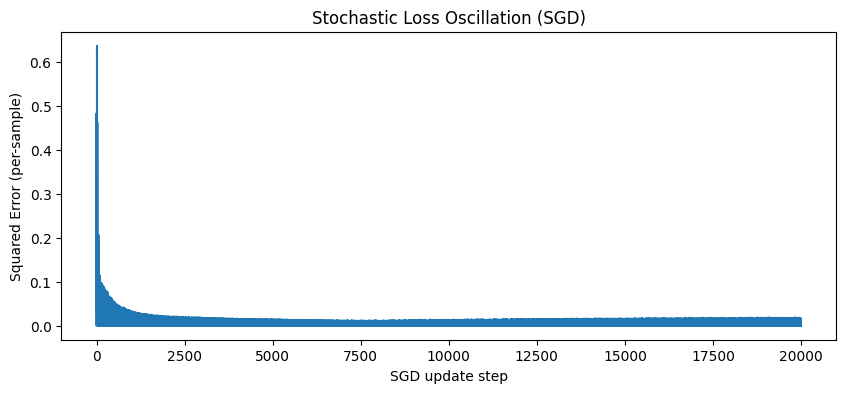

In [ ]:
import numpy as np

def stochastic_gradient_descent_v2(
    X, y, epochs, learning_rate=0.01
):
    n_samples, n_features = X.shape

    w = np.ones(n_features)
    b = 0.0

    cost_list = []
    step_list = []

    global_step = 0  #

    for epoch in range(epochs):
        indices = np.random.permutation(n_samples)

        for i in indices:
            x_i = X[i]
            y_i = y[i]

            y_pred = np.dot(w, x_i) + b
            error = y_i - y_pred

            # SGD update (MSE)
            w += learning_rate * 2 * x_i * error
            b += learning_rate * 2 * error

            # 🔥 LOG PER-STEP LOSS (đúng bản chất SGD)
            step_cost = error ** 2
            cost_list.append(step_cost)
            step_list.append(global_step)

            global_step += 1

    # Final full-dataset cost (để tham khảo)
    y_pred_all = X.dot(w) + b
    final_cost = np.mean((y - y_pred_all) ** 2)

    return w, b, final_cost, cost_list, step_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, step_list_sgd = \
    stochastic_gradient_descent_v2(
        scaled_X,
        scaled_y.reshape(-1),
        epochs=1000,
        learning_rate=0.01
    )

plt.figure(figsize=(10,4))
plt.plot(step_list_sgd, cost_list_sgd)
plt.xlabel("SGD update step")
plt.ylabel("Squared Error (per-sample)")
plt.title("Stochastic Loss Oscillation (SGD)")
plt.show()

In [ ]:
def mini_batch_gradient_descent(X, y_true, epochs, batch_size, learning_rate=0.01):
  n_samples, n_features = X.shape
  w = np.ones(shape=n_features)
  b = 0

  cost_list = []
  epoch_list = []

  for epoch in range(epochs):
    indices = np.random.permutation(n_samples) # 20 items

    for start in range(0, n_samples, batch_size):
      end = start + batch_size
      batch_idx = indices[start:end]
      X_batch = X[batch_idx]
      y_batch = y_true[batch_idx]

      y_pred = X_batch.dot(w) + b
      error = y_batch - y_pred

      w_grad = -(2 / len(y_batch)) * X_batch.T.dot(error)
      b_grad = -(2 / len(y_batch)) * np.sum(error)

      w -= learning_rate * w_grad
      b -= learning_rate * b_grad

    # log full-dataset cost per epoch
    y_pred_all = X.dot(w) + b
    cost = np.mean((y_true - y_pred_all) ** 2)

    cost_list.append(cost)
    epoch_list.append(epoch)

  return w, b, cost, cost_list, epoch_list

w_mnb, b_mnb, cost_mnb, cost_list_mnb, epoch_list_mnb = mini_batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000, 10)
w_mnb, b_mnb, cost_mnb

(array([0.90319329, 0.2271016 ]),
 np.float64(-0.07899106258807655),
 np.float64(0.0028930597840323784))

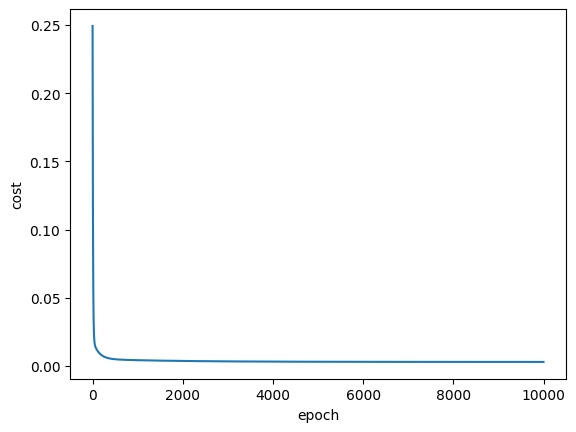

In [ ]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_mnb,cost_list_mnb)

In [ ]:
predict(2600,4, w_mnb, b_mnb)

scaled_X:  [0.62068966 0.75      ]
scaled_price:  0.6519378691313239
price:  [[120.01161233]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(120.01161233272872)